# Lending Club Case Study 

## Problem Statement

### Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application,
the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default,
which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, we will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

- Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

- Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

- Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to 'risky' applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

### Exploratory Data Analysis

In [119]:
# importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [120]:
# Read dataset from csv to pandas dataframe
df=pd.read_csv('loan.csv',low_memory=False)
#print shape of data frame
df.shape

(39717, 111)

In [121]:
# Print dataset sample
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [122]:
# Describe dataset
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


### Data Cleaning

In [123]:
missing_data = round(100*(df.isnull().sum()/len(df.index)),2)
pd.set_option('display.max_rows', 100)
# List columns where missing data is greater that 0%
missing_data.loc[missing_data>0]

emp_title                           6.19
emp_length                          2.71
desc                               32.58
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

Its clear that there are many columns where significant amount of data is missing.
From the above table, it seems that its reasonable to drop all the columns where more that 60% (mths_since_last_delinq->64.66%) of the data is missing. Also the next column with largest missing value is desc(32.58%). I think even this column can be removed as it is seems to have lot of verbose and redundant information. Therefore lets remove all columns where missing values are more than 30%.

In [124]:
#Dropping columns where missing values are more than 30%
df=df.drop(list(missing_data[missing_data>=30].index),axis=1)
df.shape

(39717, 53)

In [125]:
#Taking a look at the remaning columns with missing values
missing_data = round(100*(df.isnull().sum()/len(df.index)),2)
missing_data.loc[missing_data>0]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

Lets take a look at what each of the above columns mean from the data dictionary provided
- emp_title: The job title supplied by the Borrower when applying for the loan.
- emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
- title: The loan title provided by the borrower
- revol_util: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
- last_pymnt_d: Last month payment was received
- last_credit_pull_d: The most recent month LC pulled credit for this loan
- collections_12_mths_ex_med: Number of collections in 12 months excluding medical collections
- pub_rec_bankruptcies: Number of public record bankruptcies
- tax_liens: Number of tax liens

Some of these columns seems to be catagorical. Lets take a look at the number of unique values that each of these columns have.

In [126]:
print(len(df.emp_title.unique()))
print(len(df.emp_length.unique()))
print(len(df.title.unique()))
print(len(df.revol_util.unique()))
print(len(df.last_pymnt_d.unique()))
print(len(df.last_credit_pull_d.unique()))
print(len(df.collections_12_mths_ex_med.unique()))
print(len(df.chargeoff_within_12_mths.unique()))
print(len(df.pub_rec_bankruptcies.unique()))
print(len(df.tax_liens.unique()))

28821
12
19616
1090
102
107
2
2
4
2


So, emp_length,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens are clearly categorical.

Lets take a closer look at the values they represent.

In [127]:
df.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [128]:
df.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [129]:
df.chargeoff_within_12_mths.unique()

array([ 0., nan])

In [130]:
df.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2., nan])

In [131]:
df.tax_liens.unique()

array([ 0., nan])

Here collections_12_mths_ex_med,chargeoff_within_12_mths and tax_liens does not seem to be useful and thus can be dropped.

In [132]:
#Dropping above columns
df=df.drop(['collections_12_mths_ex_med','chargeoff_within_12_mths','tax_liens'],axis=1)
df.shape

(39717, 50)

In [133]:
#Taking a look at the remaning columns with missing values
missing_data = round(100*(df.isnull().sum()/len(df.index)),2)
missing_data.loc[missing_data>0]

emp_title               6.19
emp_length              2.71
title                   0.03
revol_util              0.13
last_pymnt_d            0.18
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

Above columns have very little null values as compared to the total dataset.
Its best to remove the rows where one of these columns are null.

In [134]:
df=df.dropna()
df.shape

(36433, 50)

Now that our dataframe is free from null values, lets take a look at the unique values of other columns.

In [135]:
#Sort columns based on number of unique values in ascending order and printing top 10
df.nunique().sort_values().head(10)

acc_now_delinq          1
application_type        1
policy_code             1
initial_list_status     1
delinq_amnt             1
pymnt_plan              1
term                    2
pub_rec_bankruptcies    3
loan_status             3
verification_status     3
dtype: int64

Columns with only 1 unique value may not be useful and can be dropped. Lets take a look at the definitions of few of these columns.
- acc_now_delinq: The number of accounts on which the borrower is now delinquent.
- application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers
- policy_code: publicly available policy_code=1, new products not publicly available policy_code=2
- initial_list_status: The initial listing status of the loan. Possible values are – W, F
- delinq_amnt: The past-due amount owed for the accounts on which the borrower is now delinquent.

Some of these fields seem categorical and seem important. However, they have only 1 unique value and therefore do not
seem useful for our analysis.

In [136]:
#Dropping above columns
df=df.drop(['acc_now_delinq','application_type','policy_code','initial_list_status','delinq_amnt'],axis=1)
df.shape

(36433, 45)

Now lets take a look at the columns with most unique values

In [137]:
#Sort columns based on number of unique values in descending order and printing top 10
df.nunique().sort_values(ascending=False).head(10)

id                 36433
member_id          36433
url                36433
total_pymnt        34802
total_pymnt_inv    34524
total_rec_int      32523
last_pymnt_amnt    32467
emp_title          28207
revol_bal          20790
title              17954
dtype: int64

id,member_id and url all seem to have unique values for all the rows. Also they do not seem to be realted to loan application
in any way. These columns can also be dropped.


In [138]:
#Dropping above columns
df=df.drop(['id','member_id','url'],axis=1)
df.shape

(36433, 42)

Now lets take a look at the remaining columns and try to understand which are important.

In [139]:
df.nunique()

loan_amnt                    863
funded_amnt                 1024
funded_amnt_inv             7474
term                           2
int_rate                     334
installment                14367
grade                          7
sub_grade                     35
emp_title                  28207
emp_length                    11
home_ownership                 4
annual_inc                  4924
verification_status            3
issue_d                       52
loan_status                    3
pymnt_plan                     1
purpose                       14
title                      17954
zip_code                     806
addr_state                    49
dti                         2857
delinq_2yrs                   11
earliest_cr_line             510
inq_last_6mths                 9
open_acc                      38
pub_rec                        5
revol_bal                  20790
revol_util                  1082
total_acc                     79
out_prncp                   1064
out_prncp_

Looking at the data dictionary provided, there are a number of columns which customer behaviour specific features. These are not available at the time of loan application process and thus should not be used as predictors for credit approval. Therefore such features needs to be dropped from the dataframe.

List of customer behaviour specific variables:
- delinq_2yrs 
- earliest_cr_line
- inq_last_6mths
- open_acc
- pub_rec
- revol_bal
- revol_util
- total_acc
- out_prncp
- out_prncp_inv
- total_pymnt
- total_pymnt_inv
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- last_credit_pull_d

In [140]:
#Dropping above columns
drop_list=['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d']
df=df.drop(drop_list,axis=1)
df.shape

(36433, 22)

In [141]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')

Lets take a look at the loan status field

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64


<AxesSubplot:ylabel='loan_status'>

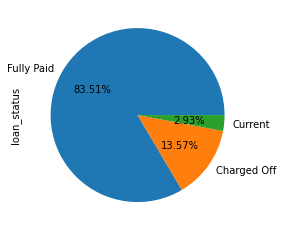

In [142]:
print(df['loan_status'].value_counts())

df['loan_status'].value_counts().plot(kind='pie',autopct='%1.2f%%')


Current on-going loans do not provide any useful data for loan default analysis and therefore needs to be removed.

In [143]:
#Removing records where loan status is Current
df=df[df.loan_status!='Current']
print(df['loan_status'].value_counts())

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64


Now lets take a look at the datatypes of remaining columns.

In [144]:
# Checking datatypes of all remaining columns 
df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
pymnt_plan               object
purpose                  object
title                    object
zip_code                 object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

Now lets standardize the values of columns

issue_d should denote date however, it is of object type. Converting the column to datetime format.

In [145]:
#Converting to datetime format
df.issue_d=pd.to_datetime(df.issue_d,format='%b-%y')
df['issue_d'].info

<bound method Series.info of 1       2011-12-01
3       2011-12-01
5       2011-12-01
6       2011-12-01
7       2011-12-01
           ...    
39551   2007-12-01
39562   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 35367, dtype: datetime64[ns]>

Next we take a look at int_rate column

In [146]:
df['int_rate'].info

<bound method Series.info of 1        15.27%
3        13.49%
5         7.90%
6        15.96%
7        18.64%
          ...  
39551    10.91%
39562    10.28%
39623    12.49%
39666    11.22%
39680    11.86%
Name: int_rate, Length: 35367, dtype: object>

In [147]:
#Stripping '%' from values and converting to float
df['int_rate'] = df['int_rate'].str.strip('%').astype('float')
df['int_rate'].info

<bound method Series.info of 1        15.27
3        13.49
5         7.90
6        15.96
7        18.64
         ...  
39551    10.91
39562    10.28
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 35367, dtype: float64>

Next we take a look at the term column

In [148]:
df['term'].info

<bound method Series.info of 1         60 months
3         36 months
5         36 months
6         60 months
7         36 months
            ...    
39551     36 months
39562     36 months
39623     36 months
39666     36 months
39680     36 months
Name: term, Length: 35367, dtype: object>

In [149]:
#Stripping 'months' from values and converting to integer
df['term']=df.term.apply(lambda x:x.split()[0]).astype('int64')
df['term'].info

<bound method Series.info of 1        60
3        36
5        36
6        60
7        36
         ..
39551    36
39562    36
39623    36
39666    36
39680    36
Name: term, Length: 35367, dtype: int64>

Next we take a look at the emp_length feature.

In [150]:
df['emp_length'].info

<bound method Series.info of 1         < 1 year
3        10+ years
5          3 years
6          8 years
7          9 years
           ...    
39551      2 years
39562       1 year
39623      8 years
39666      2 years
39680      2 years
Name: emp_length, Length: 35367, dtype: object>

In [151]:
#Strip 'years' from values and convert  to integer
df['emp_length']=df['emp_length'].map({'10+ years':10,'9 years':9,'8 years':8,'7 years':7,'6 years':6,'5 years':5,'4 years':4,'3 years':3,'2 years':2,'1 years':1,'< 1 year':0})
df.emp_length.value_counts()

10.0    8028
2.0     4083
0.0     3978
3.0     3833
4.0     3206
5.0     3043
6.0     2062
7.0     1638
8.0     1361
9.0     1176
Name: emp_length, dtype: int64

Finally, Lets also create some derived columns to make analysis simpler

In [152]:
# Split issue_d column into 2 separate columns for month and year
df['issue_d_year']=df.issue_d.dt.year
df['issue_d_month']=df.issue_d.dt.month

In [153]:
df.dtypes

loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                     float64
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
pymnt_plan                      object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
pub_rec_bankruptcies           float64
issue_d_year                     int64
issue_d_month                    int64
dtype: object

In [154]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,pub_rec_bankruptcies,issue_d_year,issue_d_month
1,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,0.0,...,Charged Off,n,car,bike,309xx,GA,1.00,0.0,2011,12
3,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10.0,...,Fully Paid,n,other,personel,917xx,CA,20.00,0.0,2011,12
5,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3.0,...,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0.0,2011,12
6,7000,7000,7000.0,60,15.96,170.08,C,C5,Southern Star Photography,8.0,...,Fully Paid,n,debt_consolidation,Loan,280xx,NC,23.51,0.0,2011,12
7,3000,3000,3000.0,36,18.64,109.43,E,E1,MKC Accounting,9.0,...,Fully Paid,n,car,Car Downpayment,900xx,CA,5.35,0.0,2011,12


In [155]:
#Saving clean data in another file
df.to_csv('cleaned_data.csv',encoding='utf-8',index=False)

### Analysis

Loading the clean dataset for analysis

In [156]:
df=pd.read_csv('cleaned_data.csv',encoding='utf-8')

In [157]:
df.shape

(35367, 24)

In [158]:
#Utility functions for analysis

#CountPlot with absolute and relative values
def count_plt(feature_name):
    ax = sns.countplot(x=df[feature_name],
                   order=df[feature_name].value_counts(ascending=False).index);
        
    abs_values = df[feature_name].value_counts(ascending=False)
    rel_values = df[feature_name].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

    ax.bar_label(container=ax.containers[0], labels=lbls)


def plot_against_loan_status(feature_name,status):
    grp = df.groupby(['loan_status',feature_name])[feature_name].count()
    cnt = df.groupby(feature_name)[feature_name].count()
    percentages = grp.unstack() * 100 / cnt.T
    ax = percentages.loc[status].plot.bar(color=sns.color_palette('hls', 16))
    ax.set_ylabel('% of loans ' + status)
    plt.tight_layout()
    return ax

### Univariate Analysis and Segmented Univariate Analysis

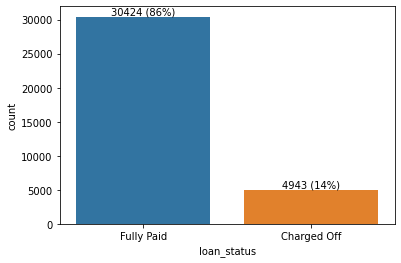

In [159]:
#Plotting loan_status count 
count_plt('loan_status')

**Observations:**
- **14% of the loans are defaulted.**

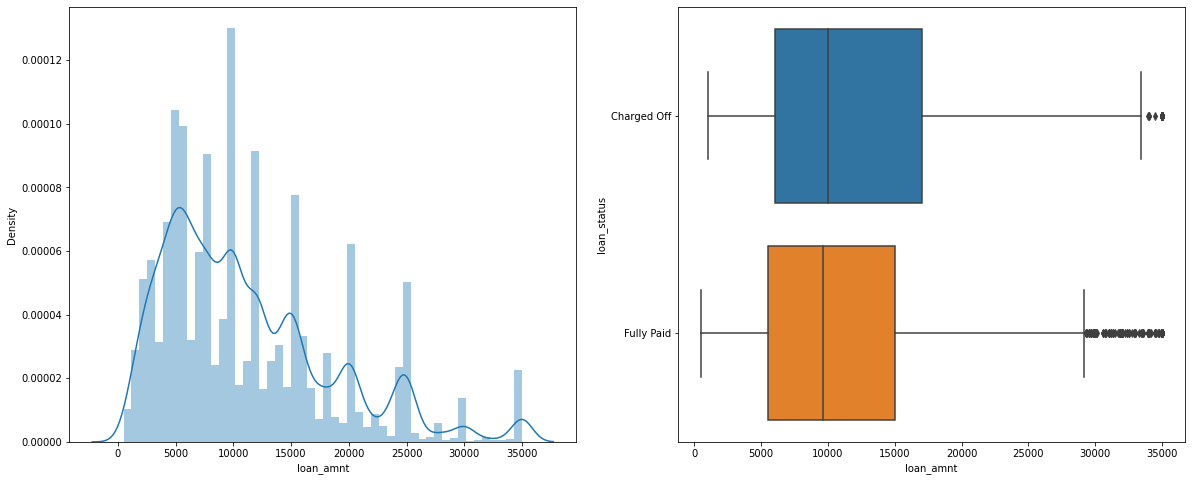

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max
loan_status,,,,,,,,,,,,,
Charged Off,4943.0,12286.147077,8064.255961,1000.0,2500.0,3500.0,6000.0,10000.0,17000.0,25000.0,28000.0,35000.0,35000.0
Fully Paid,30424.0,10945.731166,7181.867451,500.0,2400.0,3200.0,5500.0,9600.0,15000.0,21000.0,25000.0,35000.0,35000.0


In [160]:
#Plotting loan_amnt distribution
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.distplot(df['loan_amnt'])
plt.subplot(1, 2, 2)
sns.boxplot(x=df['loan_amnt'], y=df['loan_status'], data=df)
plt.show()
df.groupby('loan_status')['loan_amnt'].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

**Observations:**
- **The loan amount distribution seems to be right-skewed as mean is greater than the median**
- **Most people seem to have taken a loan of around 10000 and very few people have taken more than 30000**
- **Charged off loans seems to have a higher average loan amount request indicating that the higher the loan amount higher the chances of default**

Next Lets take a look at the categorical features

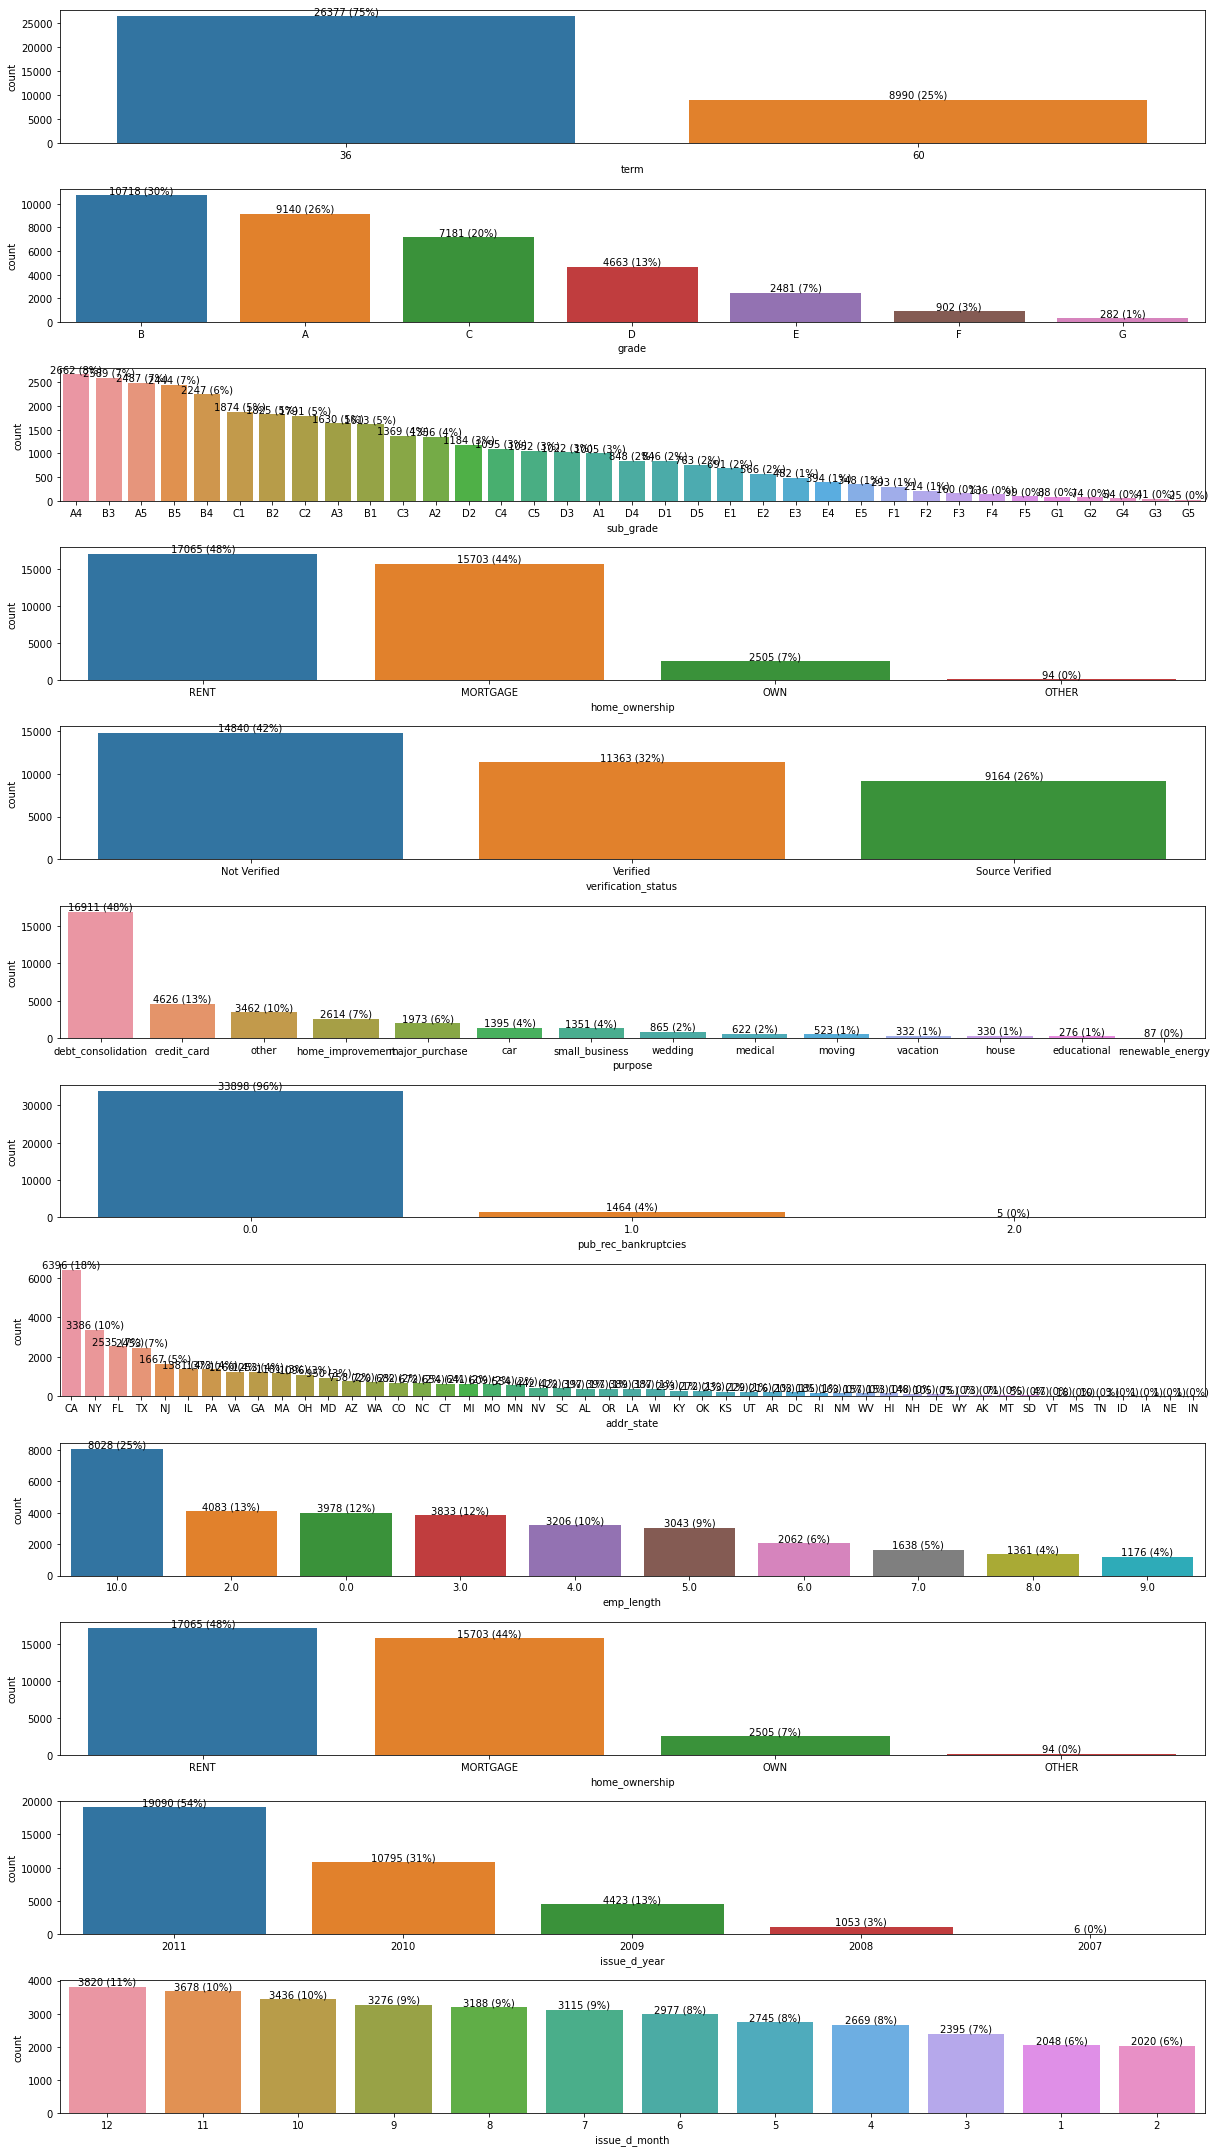

In [161]:
categorical_list=['term','grade','sub_grade','home_ownership','verification_status','purpose','pub_rec_bankruptcies','addr_state','emp_length','home_ownership','issue_d_year','issue_d_month']
r=int(len(categorical_list))
plt.figure(figsize=(17,30))
for idx,c in enumerate(categorical_list,start=1):
    plt.subplot(r,1,idx)
    count_plt(c)
    plt.tight_layout()

**Observations:**
- **75% of loans are for 36 months**
- **Chances of getting a loan are more for high grade customers**
- **Most people applying for loan either live on rent or have existing mortgages**
- **Surprisingly, lot of non-verified people have received loans**
- **48% of customers' main purpose of buying a loan is debt consolidation**
- **Most loans are from CA.This is expected as the company's is based out of CA.**
- **25% loan applications have 10+ years of employment.**
- **Every year the number of loans approved has increased.**
- **Analyzing monthly issue data, company seems to approve more loans in the second half of the year**


<AxesSubplot:xlabel='purpose', ylabel='% of loans Charged Off'>

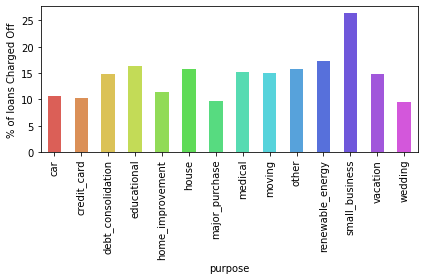

In [162]:
#Plotting purpose against % of charged off loans
plot_against_loan_status('purpose','Charged Off')

**Observations:**
- **While most of the above % are inline with the full dataset.It seems that the small business loans are more prone to default**

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='% of loans Charged Off'>

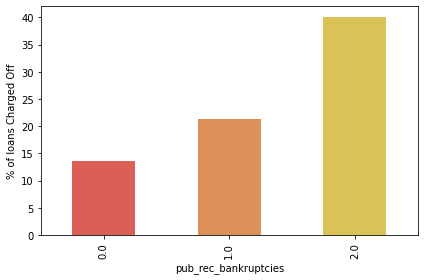

In [163]:
#Plotting pub_rec_bankruptcies against % of charged off loans
plot_against_loan_status('pub_rec_bankruptcies','Charged Off')

**Observations:**
- **As expected, % of defaults are proportial with increase in prior history of bankrupcies**

<AxesSubplot:xlabel='grade', ylabel='% of loans Charged Off'>

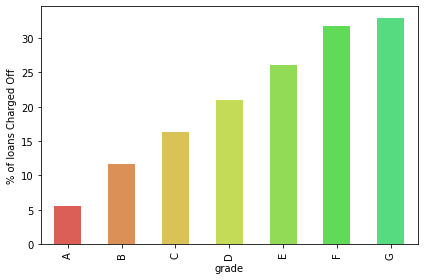

In [164]:
#Plotting grade against % of charged off loans
plot_against_loan_status('grade','Charged Off')

**Observations:**
- **As expected, % of defaults are higher for lower grade loans**

<AxesSubplot:xlabel='emp_length', ylabel='% of loans Charged Off'>

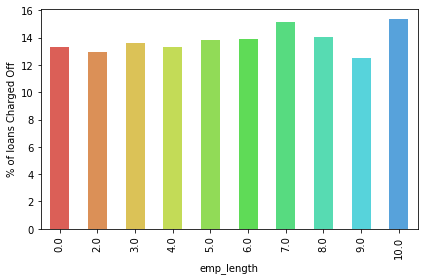

In [165]:
#Plotting emp_length against % of charged off loans
plot_against_loan_status('emp_length','Charged Off')

**Observations:**
- **Employment length does not seem to have any significant impact on default rate**

<AxesSubplot:xlabel='home_ownership', ylabel='% of loans Charged Off'>

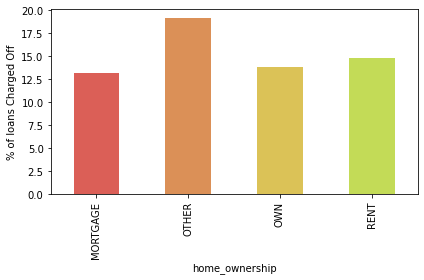

In [166]:
#Plotting home_ownership against % of charged off loans
plot_against_loan_status('home_ownership','Charged Off')

**Observations:**
- **Home Ownership does not seem to have any significant impact on default rate**

<AxesSubplot:xlabel='verification_status', ylabel='% of loans Charged Off'>

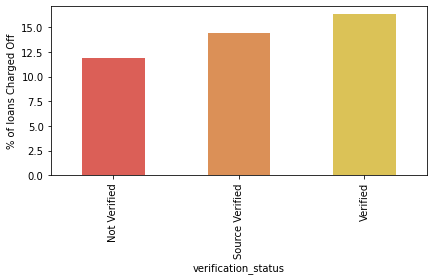

In [167]:
#Plotting verification_status against % of charged off loans
plot_against_loan_status('verification_status','Charged Off')


**Observations:**
- **Surprisingly, there are more number of verified applicants who defaulted.It appears that the verification process of the loan company is not very robust.**
- **Quite a lot of applicants who are non-verified but were still given a loan. Company should stop this practice to further decrease default rate.**

<AxesSubplot:xlabel='issue_d_year', ylabel='% of loans Charged Off'>

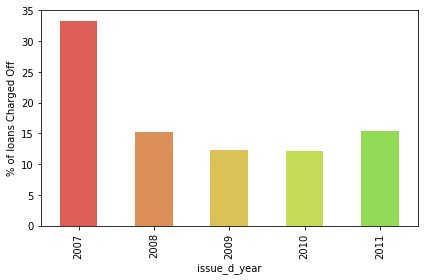

In [168]:
#Plotting issue_d_year against % of charged off loans
plot_against_loan_status('issue_d_year','Charged Off')

**Observations:**
- **While the number of loans approved have increased each year, the default rate has come down significantly.This indicates that loan company has significantly improved the review process for loan approval over the years.**

Now Lets take a look at some continuous variables.

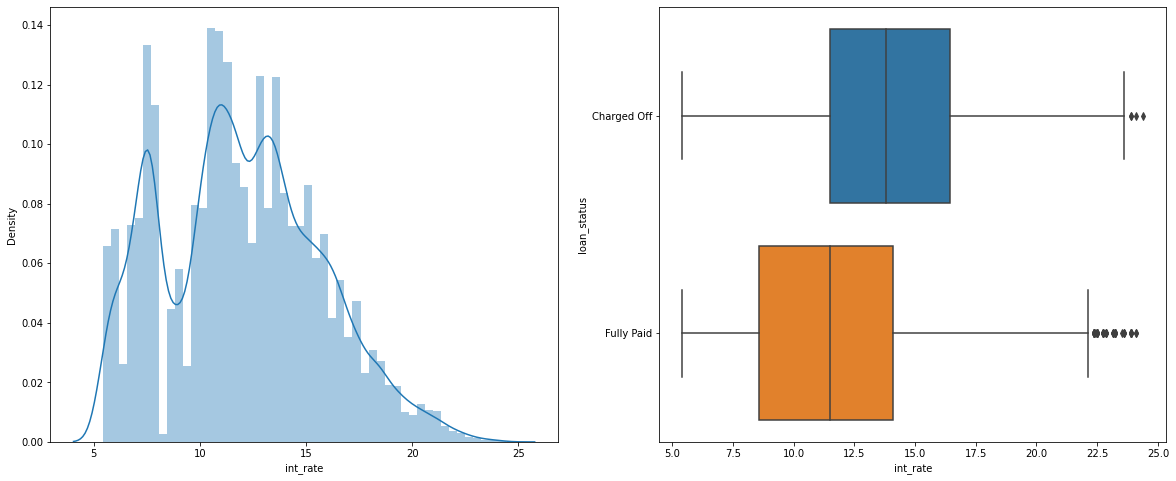

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,13.929828,3.647619,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.0,11.667243,3.613734,5.42,8.59,11.49,14.09,24.11


In [169]:
#Plotting int_rate distribution
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.distplot(df['int_rate'])
plt.subplot(1, 2, 2)
sns.boxplot(x=df['int_rate'], y=df['loan_status'], data=df)
plt.show()
df.groupby('loan_status')['int_rate'].describe()

<AxesSubplot:xlabel='disc_int_rate', ylabel='% of loans Charged Off'>

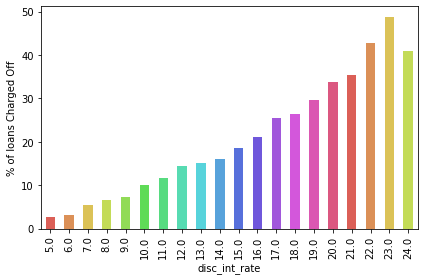

In [170]:
#Plotting int_rate against % of charged off loans
#Since int_rate is a continuous variable, lets bin the values to make it discrete
df['disc_int_rate'] = round(df['int_rate'])
plot_against_loan_status('disc_int_rate','Charged Off')

**Observations:**
- **As expected, average interest rate on charger off loan is higher.This might be because the interest rate kept increasing as the risk increased due to non regular payment.**

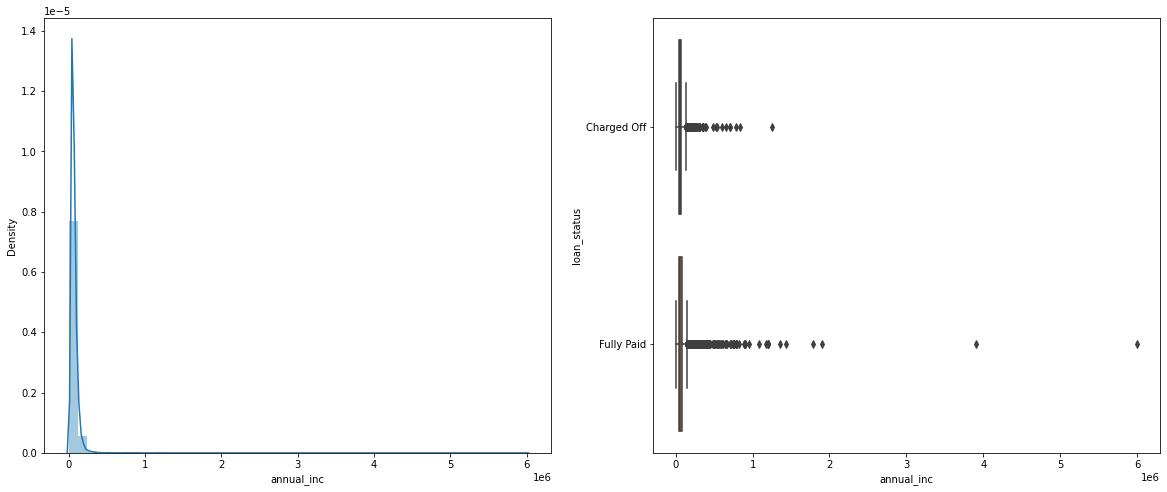

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,63019.486686,47410.855336,4080.0,38400.0,54000.0,75000.0,1250000.0
Fully Paid,30424.0,70083.236679,66215.462181,4000.0,42000.0,60000.0,84000.0,6000000.0


In [171]:
#Plotting annual_inc distribution
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.distplot(df['annual_inc'])
plt.subplot(1, 2, 2)
sns.boxplot(x=df['annual_inc'], y=df['loan_status'], data=df)
plt.show()
df.groupby('loan_status')['annual_inc'].describe()

There are definitely some outliers with very high income. Lets remove outliers and only keep data within 3 standard deviation.

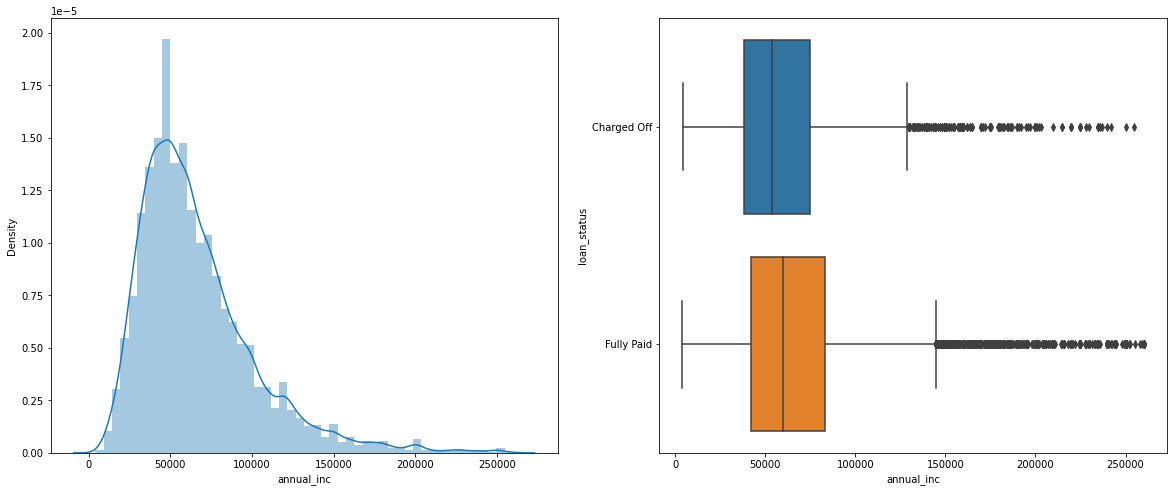

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,63019.486686,47410.855336,4080.0,38400.0,54000.0,75000.0,1250000.0
Fully Paid,30424.0,70083.236679,66215.462181,4000.0,42000.0,60000.0,84000.0,6000000.0


In [172]:
#Filtering outliters
df1 = df[np.abs(df.annual_inc-df.annual_inc.mean()) <= (3*df.annual_inc.std())]
#Plotting annual_inc distribution with outliers removed
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.distplot(df1['annual_inc'])
plt.subplot(1, 2, 2)
sns.boxplot(x=df1['annual_inc'], y=df1['loan_status'], data=df1)
plt.show()
df.groupby('loan_status')['annual_inc'].describe()

In [173]:
#Lets divide annual_inc with 10000 unit interval
df1['annual_inc_bin'] = (df1['annual_inc']/10000).astype('int64')
df1['annual_inc_bin'].info

<bound method Series.info of 0        3
1        4
2        3
3        4
4        4
        ..
35362    8
35363    3
35364    3
35365    4
35366    3
Name: annual_inc_bin, Length: 35122, dtype: int64>

<AxesSubplot:xlabel='annual_inc_bin', ylabel='% of loans Charged Off'>

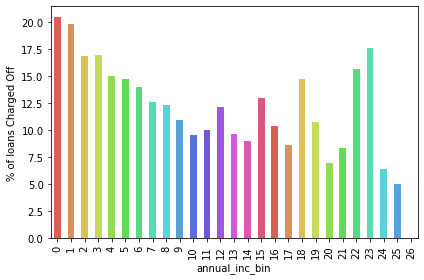

In [174]:
#Plotting annual_inc_bin against % of charged off loans

grp = df1.groupby(['loan_status','annual_inc_bin'])['annual_inc_bin'].count()
cnt = df1.groupby('annual_inc_bin')['annual_inc_bin'].count()
percentages = grp.unstack() * 100 / cnt.T
ax = percentages.loc['Charged Off'].plot.bar(color=sns.color_palette('hls', 16))
ax.set_ylabel('% of loans Charged Off')
plt.tight_layout()
ax

**Observations:**
- **As expected, loan defaults are higher for applicants from lower income group.**

Next we take a lok at the dti variable. 
According to the data dictionary dti is a ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

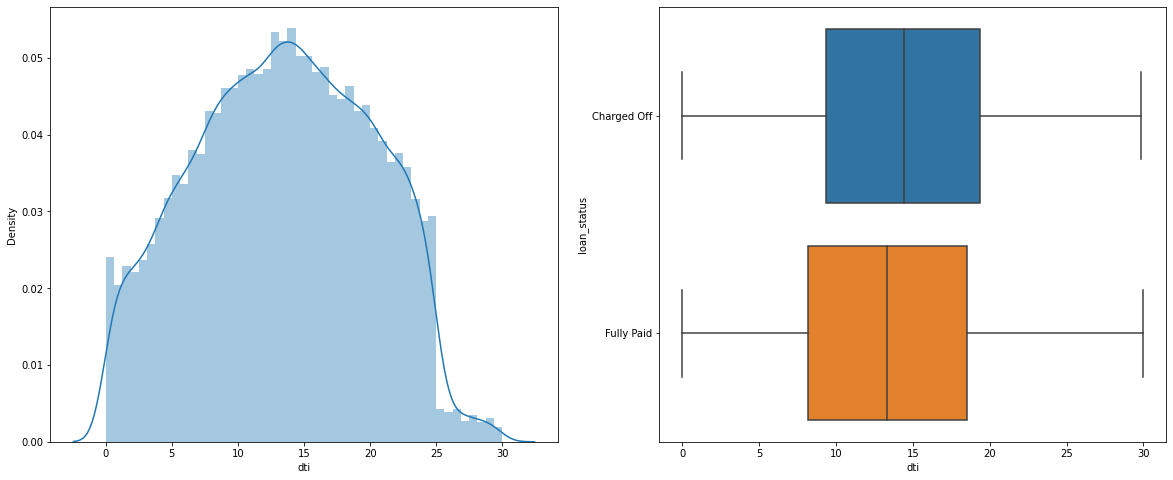

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,14.160908,6.522564,0.0,9.355,14.440,19.34,29.85
Fully Paid,30424.0,13.280979,6.646843,0.0,8.160,13.345,18.53,29.99


In [175]:
#Plotting dti distribution
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.distplot(df['dti'])
plt.subplot(1, 2, 2)
sns.boxplot(x=df['dti'], y=df['loan_status'], data=df)
plt.show()
df.groupby('loan_status')['dti'].describe()

<AxesSubplot:xlabel='dti_bin', ylabel='% of loans Charged Off'>

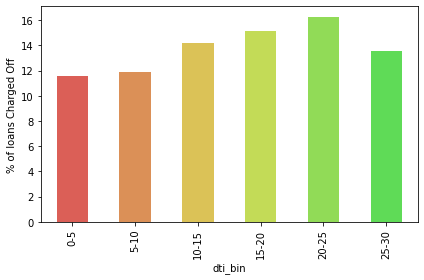

In [176]:
#Binning dti variable for further analysis
df['dti_bin'] = pd.cut(df['dti'], [0,5,10,15,20,25,30], labels=['0-5','5-10','10-15','15-20','20-25','25-30'])

#Plotting dti_bin against % of charged off loans
plot_against_loan_status('dti_bin','Charged Off')

**Observations:**
- **It seems that as dti increases, risk of default increases.**

Now lets take a look at a special derived varibale which is usually a very important indicator of applicants ability to successfully pay the loan.
i.e **Ratio of loan amount to annual income**

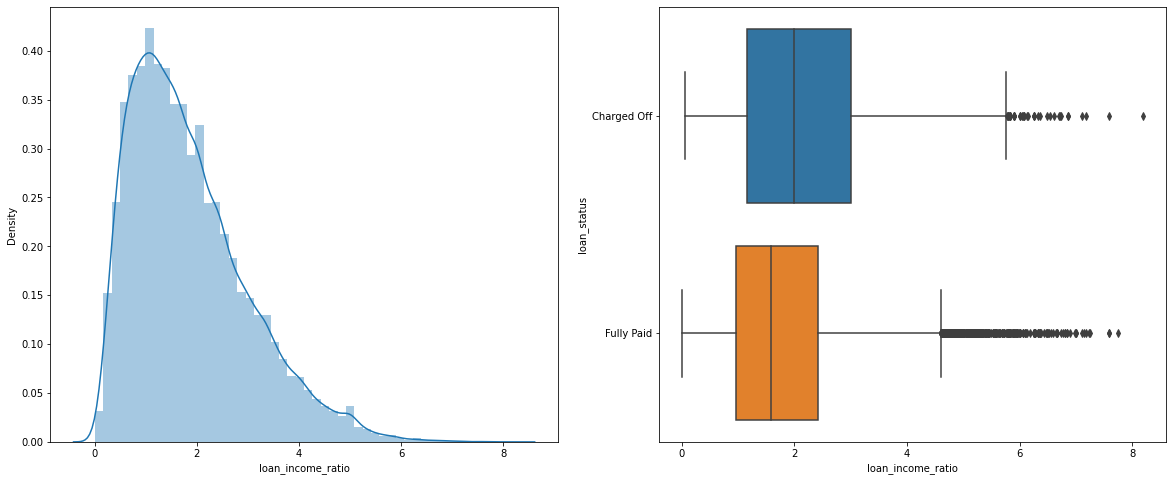

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.0,2.192239,1.292667,0.052083,1.166667,2.000000,3.000000,8.196721
Fully Paid,30424.0,1.798941,1.106157,0.007895,0.960000,1.584198,2.415196,7.738095


In [177]:
df['loan_income_ratio'] = df['loan_amnt'] * 10 / df['annual_inc']

#Plotting loan_income_ratio distribution
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
sns.distplot(df['loan_income_ratio'])
plt.subplot(1, 2, 2)
sns.boxplot(x=df['loan_income_ratio'], y=df['loan_status'], data=df)
plt.show()
df.groupby('loan_status')['loan_income_ratio'].describe()

<AxesSubplot:xlabel='loan_income_ratio', ylabel='% of loans Charged Off'>

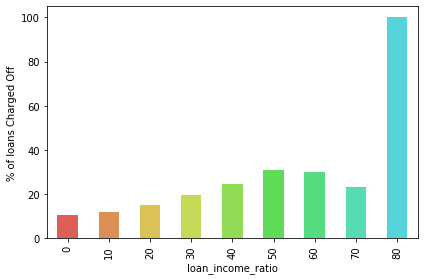

In [178]:
#Binning loan_income_ratio
df['loan_income_ratio'] = (df['loan_income_ratio'].astype('int64')) * 10
#Plotting loan_income_ratio against % of charged off loans
plot_against_loan_status('loan_income_ratio','Charged Off')

**Observations:**
- **It seems that as long as the loan to income ratio is between 10-20, chances of default are low.**

### Bivariate Analysis

Lets first create a heatmap to see how other variables are co-related with each other.

<AxesSubplot:>

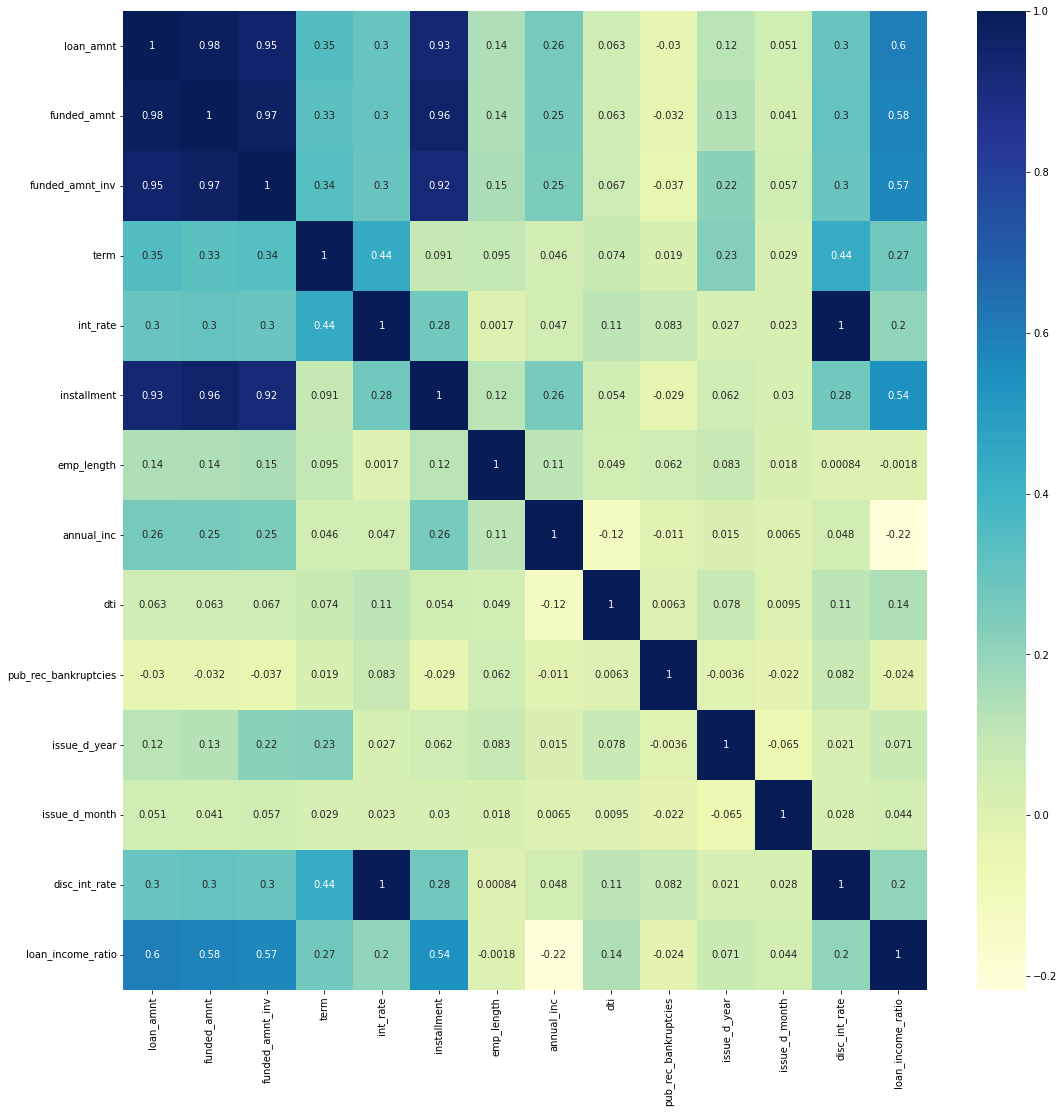

In [179]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")


**Observations:**
- **funded_amnt,funded_amnt_inv,installment are all highly co-related to loan_amnt and thus can be ignored.**

Now lets plot some interesting variables together which are loosely co-related.

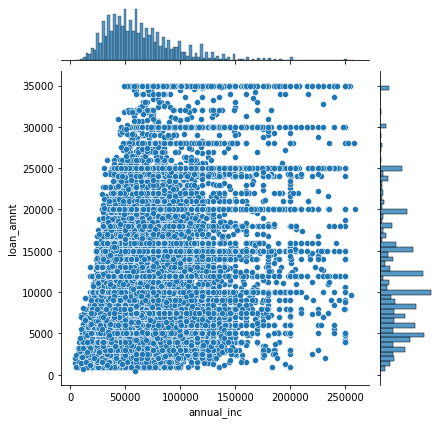

In [180]:
#Annual income vs Loan amount
sns.jointplot('annual_inc', 'loan_amnt', df.loc[df['annual_inc']<260000])

**Observations:**
- **People with lower annual_inc also seems to be taking high value loans which has high risk of default.**

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

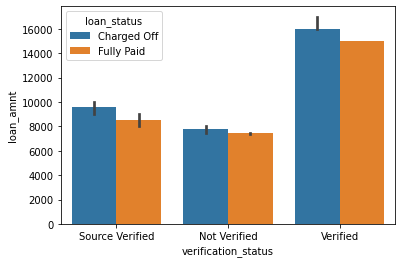

In [181]:
#loan_amnt vs loan status vs verification_status 
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=df, estimator=np.median)

**Observations:**
- **It seems to be the case that since higher loan amounts are risky they are more likely to be verified. This is why earlier we observer that verified loans had a higher default rate.**

<AxesSubplot:xlabel='addr_state', ylabel='loan_amnt'>

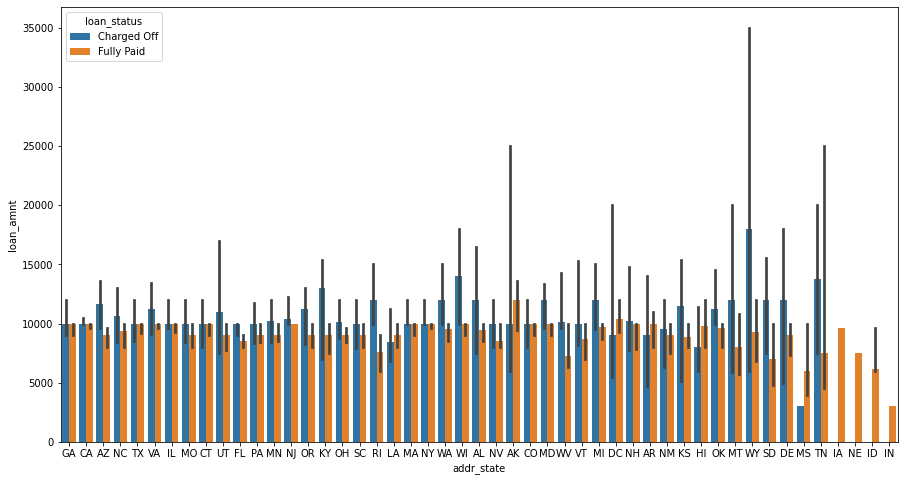

In [182]:
#addr_state vs loan status vs loan_amnt 
plt.figure(figsize=(15,8))
sns.barplot(x='addr_state', y='loan_amnt', hue="loan_status", data=df, estimator=np.median)

**Observations:**
- **Certain states like WY seem to have high default rates while loans from IA,NE,ID and IN have no defaults.**

<AxesSubplot:xlabel='purpose', ylabel='loan_income_ratio'>

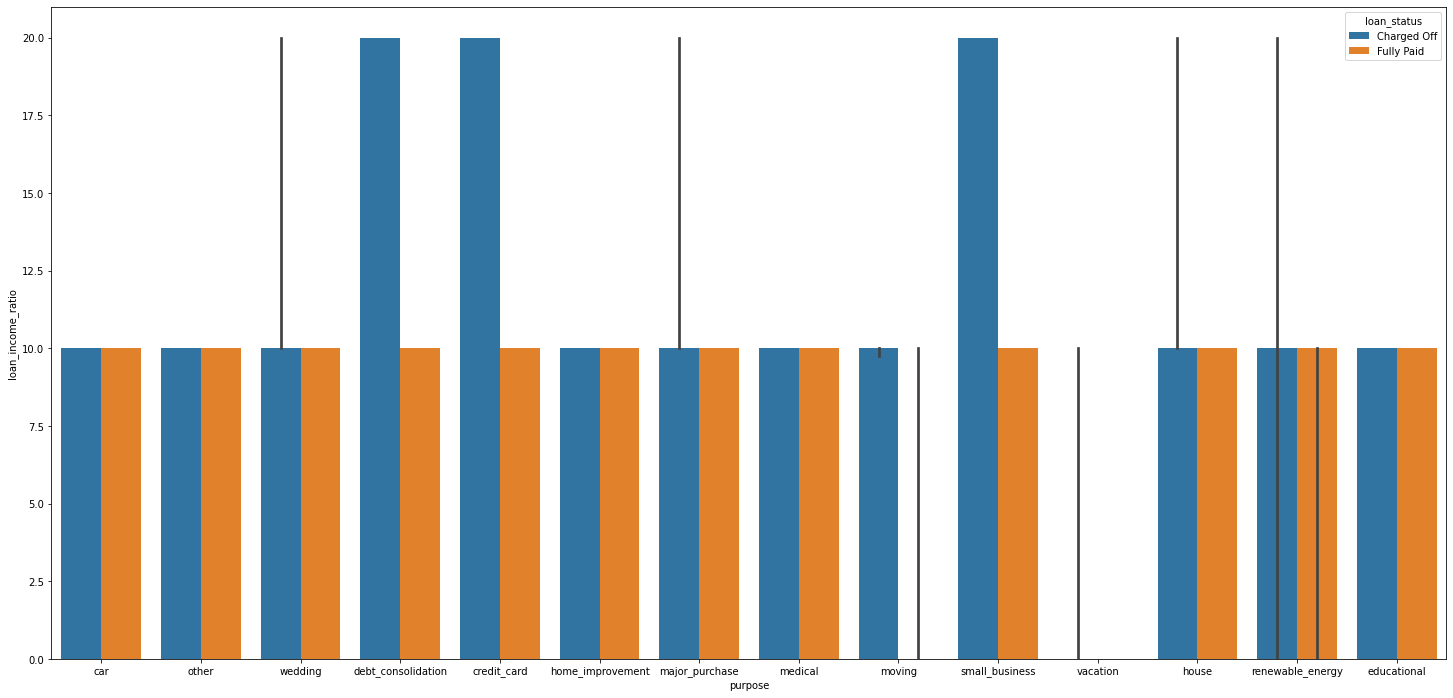

In [183]:
#purpose vs loan status vs loan_income_ratio 
plt.figure(figsize=(25,12))
sns.barplot(x='purpose', y='loan_income_ratio', hue="loan_status", data=df, estimator=np.median)

**Observations:**
- **Applicants taking loan for small businesses and for debt_consolidation with high loan to income ratio seems to have very high default rate.**

<AxesSubplot:xlabel='disc_int_rate', ylabel='loan_amnt'>

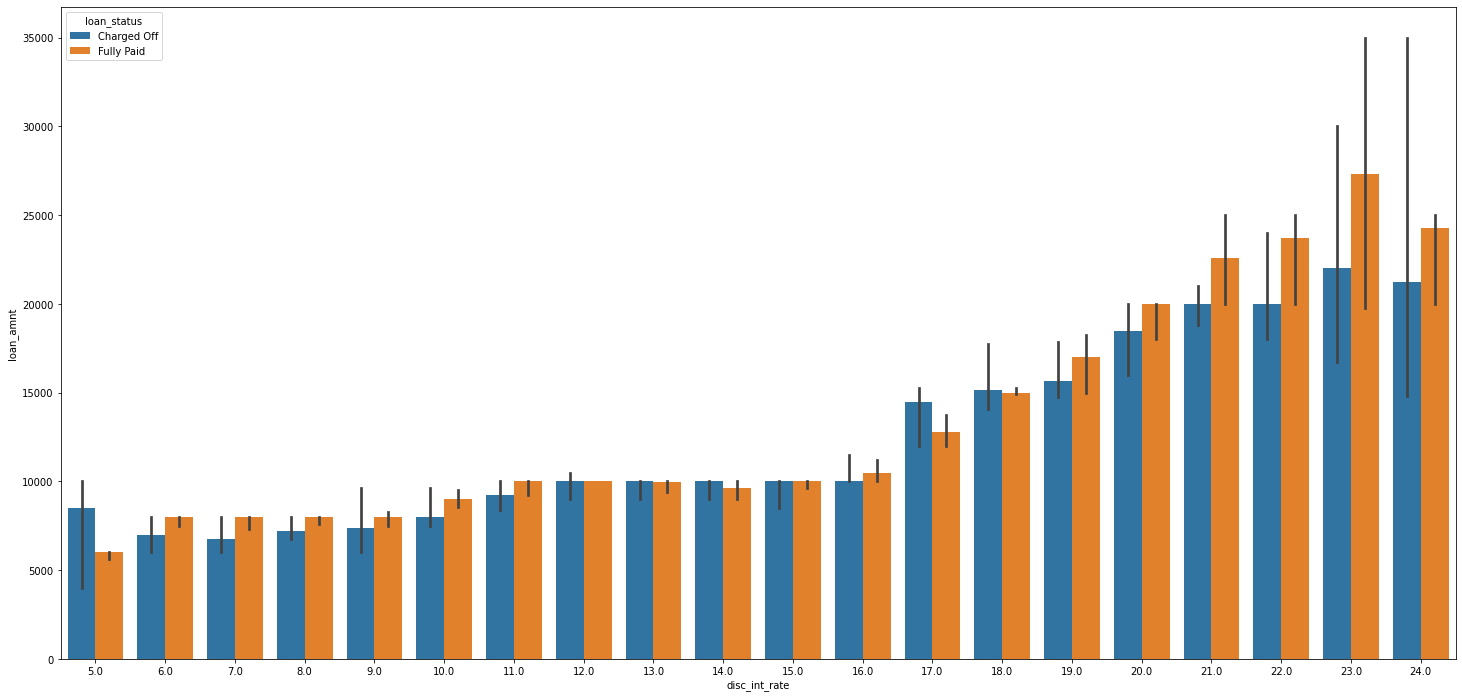

In [184]:
#loan_amnt vs loan status vs int_rate 
plt.figure(figsize=(25,12))
sns.barplot(x='disc_int_rate', y='loan_amnt', hue="loan_status", data=df, estimator=np.median)

**Observations:**
- **Chances of default increases as the interest rate and loan amount increases**

### Conclusion

Based on the above analysis below is the list of primary features which should be used to predict default for loan applications:

| Features    | Description | Effect on Default Rate    |
| :---        | :----   | :--- |
| loan_amnt   | The listed amount of the loan applied for by the borrower.       | loan amount above median leads to more default   |
| pub_rec_bankruptcies  | Number of public record bankruptcies        | if any public record bankrupcies are present then there is a strong chance of default       |
| grade  | LC assigned loan grade        | grade C and below have higher chances of defaults      |
| annual_inc  | The self-reported annual income provided by the borrower during registration.        |annual income in the lower 25% quartile have more chances of defaults      |
| loan_income_ratio  | Loan to income Ratio        | loan income ratio above 20 have high chances of default       |
| int_rate  | Interest Rate on the loan        | int rate above median have higher chances of default      |

Apart from these primary features below are few more features which have some co-relation with default:
- People taking loan for small business purpose have a high tendency of defaulting
- Applicants from certain states like WY seem to have high default rates
- Applicants with dti greater than 20 have higher chances of defaults

### Recommendations

- **Stop approving loans where loan amount to income ratio is greater than 20.**
- **Reduce number of loan approvals to small businesses in general.**
- **Reduce approvals to applicants with grade C and below for high risk states like WY and grade D and below for everyone else.**
- **Stop approving loans to applicants with existing public record bankruptcies.**
- **Start charging more interest rate to applicants with dti greater than 20.**